In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
path = "Data/CTA_Questionnaire.csv"
df = pd.read_csv(path)

In [36]:
type(df)

pandas.core.frame.DataFrame

In [85]:
df.head()

,Timestamp,Cook,Enjoy,Grocery,Favourite,Meals,Location,RestaurantType,Rating
0,2024/10/17 2:13:19 PM GMT+1,Often (4-6 times weekly),Yes!,Tesco;Sainsbury's;Chinese store!!!,Chinese Cuisine;Japanese Cuisine;Thai Cuisine,3,"Central (Buckingham Palace, the West End, the ...",Thai Cuisine,2
1,2024/10/17 2:13:19 PM GMT+1,Often (4-6 times weekly),Neutral,Asda;Lidl;Waitrose,Caribbean Cuisine;,4+,"South (Clapham, Brixton, and Greenwich etc)",Caribbean Cuisine,5
2,2024/10/17 2:14:21 PM GMT+1,Rare (0-2 weekly),Yes!,Waitrose,Chinese Cuisine;Italian Cuisine;Japanese Cuisine,2,"East (Shoreditch, Hackney, Stratford, and Cana...",Chinese Cuisine,4
3,2024/10/17 2:14:35 PM GMT+1,Rare (0-2 weekly),Neutral,Tesco;Sainsbury's;Farmers' Market /Independent...,Japanese Cuisine;Thai Cuisine;Burmese,3,"East (Shoreditch, Hackney, Stratford, and Cana...",Japanese Cuisine;Thai Cuisine,3
4,2024/10/17 2:15:21 PM GMT+1,Very often (everyday!),Yes!,Lidl,Indian Cuisine;Mexican Cuisine;Thai Cuisine,3,"East (Shoreditch, Hackney, Stratford, and Cana...",Thai Cuisine,6


In [38]:
display(df)

,Timestamp,Cook,Enjoy,Grocery,Favourite,Meals,Location,RestaurantType,Rating
0,2024/10/17 2:13:19 PM GMT+1,Often (4-6 times weekly),Yes!,Tesco;Sainsbury's;Chinese store!!!,Chinese Cuisine;Japanese Cuisine;Thai Cuisine,3,"Central (Buckingham Palace, the West End, the ...",Thai Cuisine,2
1,2024/10/17 2:13:19 PM GMT+1,Often (4-6 times weekly),Neutral,Asda;Lidl;Waitrose,Caribbean Cuisine;,4+,"South (Clapham, Brixton, and Greenwich etc)",Caribbean Cuisine,5
2,2024/10/17 2:14:21 PM GMT+1,Rare (0-2 weekly),Yes!,Waitrose,Chinese Cuisine;Italian Cuisine;Japanese Cuisine,2,"East (Shoreditch, Hackney, Stratford, and Cana...",Chinese Cuisine,4
3,2024/10/17 2:14:35 PM GMT+1,Rare (0-2 weekly),Neutral,Tesco;Sainsbury's;Farmers' Market /Independent...,Japanese Cuisine;Thai Cuisine;Burmese,3,"East (Shoreditch, Hackney, Stratford, and Cana...",Japanese Cuisine;Thai Cuisine,3
4,2024/10/17 2:15:21 PM GMT+1,Very often (everyday!),Yes!,Lidl,Indian Cuisine;Mexican Cuisine;Thai Cuisine,3,"East (Shoreditch, Hackney, Stratford, and Cana...",Thai Cuisine,6
5,2024/10/17 2:15:44 PM GMT+1,Very often (everyday!),Yes!,Tesco;Asda;Morrisons,Indian Cuisine;Mexican Cuisine;Middle Eastern ...,2,No I don't have one,Don't have preference,3
6,2024/10/17 2:17:07 PM GMT+1,Occasionally (weekly),Neutral,Tesco;Lidl;Waitrose;Sainsbury's;Co-op Food,Chinese Cuisine;Mexican Cuisine;Thai Cuisine;V...,2,"Central (Buckingham Palace, the West End, the ...",Chinese Cuisine,5
7,2024/10/17 2:40:22 PM GMT+1,Often (4-6 times weekly),Yes!,Waitrose;Morrisons,Mediterranean Cuisine;Thai Cuisine;West African,3,"East (Shoreditch, Hackney, Stratford, and Cana...",Peruvian Cuisine,5
8,2024/10/17 3:57:36 PM GMT+1,Often (4-6 times weekly),Yes!,HelloFresh,Chinese Cuisine;Mexican Cuisine;Peruvian Cuisine,4,"Central (Buckingham Palace, the West End, the ...",Peruvian Cuisine,5
9,2024/10/17 4:47:46 PM GMT+1,Very often (everyday!),Yes!,Tesco;Sainsbury's;Morrisons,Italian Cuisine,3,No I don't have one,Italian Cuisine,5


In [126]:
cook = df.Cook.value_counts()
print(cook)

Cook
Often (4-6 times weekly)    8
Occasionally (weekly)       4
Very often (everyday!)      3
Rare (0-2 weekly)           2
Name: count, dtype: int64


In [122]:
df.Enjoy.value_counts()

Enjoy
Yes!       13
Neutral     4
Name: count, dtype: int64

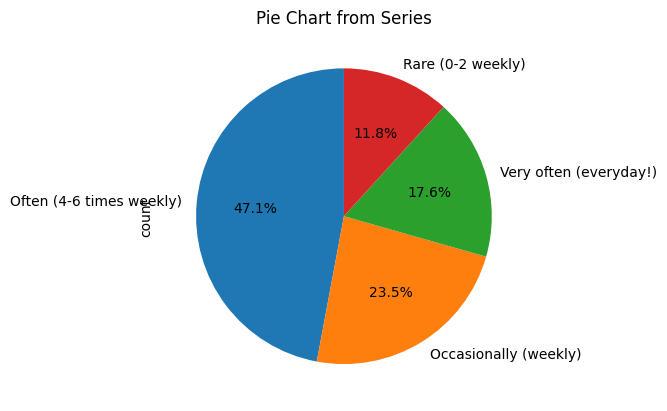

In [127]:
cook.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart from Series')
plt.show()

In [14]:
df["Cook?"]

0     Often (4-6 times weekly)
1     Often (4-6 times weekly)
2            Rare (0-2 weekly)
3            Rare (0-2 weekly)
4       Very often (everyday!)
5       Very often (everyday!)
6        Occasionally (weekly)
7     Often (4-6 times weekly)
8     Often (4-6 times weekly)
9       Very often (everyday!)
10    Often (4-6 times weekly)
11    Often (4-6 times weekly)
12    Often (4-6 times weekly)
13    Often (4-6 times weekly)
14       Occasionally (weekly)
15       Occasionally (weekly)
16       Occasionally (weekly)
Name: Cook?, dtype: object

In [16]:
df["Cook?"].value_counts()

Cook?
Often (4-6 times weekly)    8
Occasionally (weekly)       4
Very often (everyday!)      3
Rare (0-2 weekly)           2
Name: count, dtype: int64

In [30]:
df["Enjoy?"].value_counts()

Enjoy?
Yes!       13
Neutral     4
Name: count, dtype: int64

In [25]:
avg_rate = df.groupby('Cook?')['Rate?'].mean()
print(avg_rate)

Cook?
Occasionally (weekly)       3.750000
Often (4-6 times weekly)    4.000000
Rare (0-2 weekly)           3.500000
Very often (everyday!)      4.666667
Name: Rate?, dtype: float64


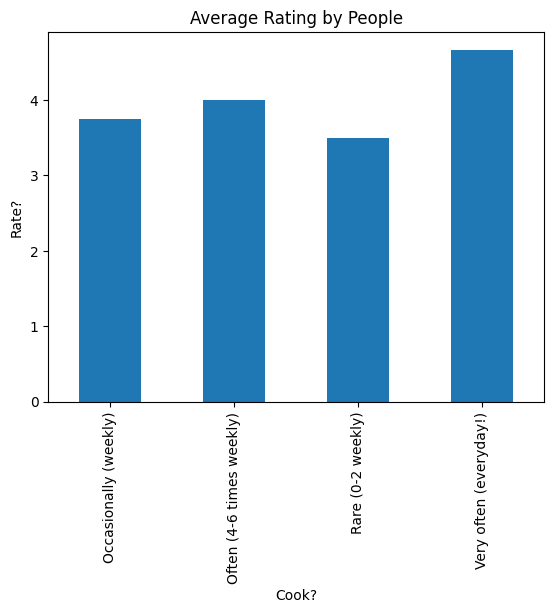

In [27]:
avg_rate.plot(kind='bar')
plt.title('Average Rating by People')
plt.xlabel('Cook?')
plt.ylabel('Rate?')
plt.show()

In [46]:
print(df.head())

                     Timestamp                      Cook    Enjoy  \
0  2024/10/17 2:13:19 PM GMT+1  Often (4-6 times weekly)     Yes!   
1  2024/10/17 2:13:19 PM GMT+1  Often (4-6 times weekly)  Neutral   
2  2024/10/17 2:14:21 PM GMT+1         Rare (0-2 weekly)     Yes!   
3  2024/10/17 2:14:35 PM GMT+1         Rare (0-2 weekly)  Neutral   
4  2024/10/17 2:15:21 PM GMT+1    Very often (everyday!)     Yes!   

                                             Grocery  \
0                 Tesco;Sainsbury's;Chinese store!!!   
1                                 Asda;Lidl;Waitrose   
2                                           Waitrose   
3  Tesco;Sainsbury's;Farmers' Market /Independent...   
4                                               Lidl   

                                          Favourite Meals  \
0     Chinese Cuisine;Japanese Cuisine;Thai Cuisine     3   
1                                Caribbean Cuisine;    4+   
2  Chinese Cuisine;Italian Cuisine;Japanese Cuisine     2   
3   

In [54]:
response_counts = df["Enjoy"].value_counts()
print(response_counts)

Enjoy
Yes!       13
Neutral     4
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

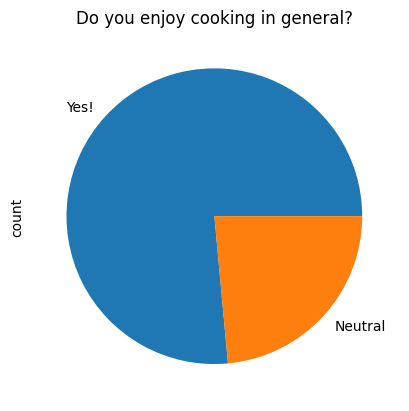

In [65]:
response_counts.plot.pie()
plt.title("Do you enjoy cooking in general?")
plt.show

In [53]:
print(df["Rating"].value_counts())

Grocery
Tesco;Sainsbury's;Farmers' Market /Independent Shops    2
Morrisons                                               2
Asda;Lidl;Waitrose                                      1
Waitrose                                                1
Lidl                                                    1
Tesco;Asda;Morrisons                                    1
Tesco;Sainsbury's;Chinese store!!!                      1
Tesco;Lidl;Waitrose;Sainsbury's;Co-op Food              1
Waitrose;Morrisons                                      1
Tesco;Sainsbury's;Morrisons                             1
HelloFresh                                              1
M&S                                                     1
not particular about shop                               1
Sainsbury's;Farmers' Market /Independent Shops          1
Waitrose;Sainsbury's                                    1
Name: count, dtype: int64


In [66]:
print(df.columns)

Index(['Timestamp', 'Cook', 'Enjoy', 'Grocery', 'Favourite', 'Meals',
       'Location', 'RestaurantType', 'Rating'],
      dtype='object')


In [71]:
df.loc[df.Enjoy =="Neutral"]

,Timestamp,Cook,Enjoy,Grocery,Favourite,Meals,Location,RestaurantType,Rating
1,2024/10/17 2:13:19 PM GMT+1,Often (4-6 times weekly),Neutral,Asda;Lidl;Waitrose,Caribbean Cuisine;,4+,"South (Clapham, Brixton, and Greenwich etc)",Caribbean Cuisine,5
3,2024/10/17 2:14:35 PM GMT+1,Rare (0-2 weekly),Neutral,Tesco;Sainsbury's;Farmers' Market /Independent...,Japanese Cuisine;Thai Cuisine;Burmese,3,"East (Shoreditch, Hackney, Stratford, and Cana...",Japanese Cuisine;Thai Cuisine,3
6,2024/10/17 2:17:07 PM GMT+1,Occasionally (weekly),Neutral,Tesco;Lidl;Waitrose;Sainsbury's;Co-op Food,Chinese Cuisine;Mexican Cuisine;Thai Cuisine;V...,2,"Central (Buckingham Palace, the West End, the ...",Chinese Cuisine,5
10,2024/10/17 8:27:53 PM GMT+1,Often (4-6 times weekly),Neutral,M&S,Chinese Cuisine,2,"Central (Buckingham Palace, the West End, the ...",Chinese Cuisine,1


In [93]:
df.Rating.value_counts()

Rating
5    7
3    4
4    3
2    1
6    1
1    1
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of ratings among people')

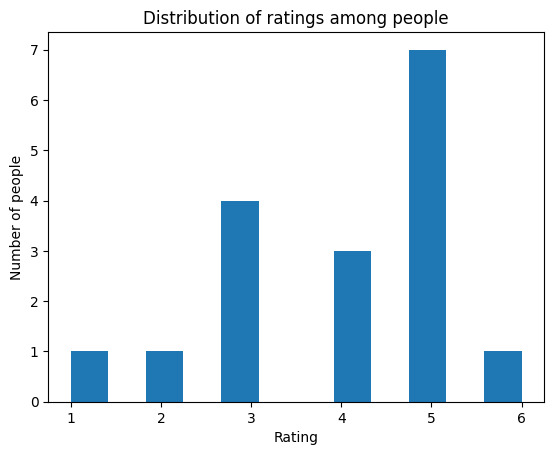

In [109]:
plt.hist(df.Rating, bins = 12)
plt.xlabel("Rating")
plt.ylabel("Number of people")
plt.title("Distribution of ratings among people")

In [91]:
#Make a subsection of dataframe which only consist of people who fancy cooking
#two dimension = TWO set of bracket
love_cooking_df = df[[ key for key in df.Enjoy == "Yes!" ]]

In [92]:
display(love_cooking_df)

,Timestamp,Cook,Enjoy,Grocery,Favourite,Meals,Location,RestaurantType,Rating
0,2024/10/17 2:13:19 PM GMT+1,Often (4-6 times weekly),Yes!,Tesco;Sainsbury's;Chinese store!!!,Chinese Cuisine;Japanese Cuisine;Thai Cuisine,3,"Central (Buckingham Palace, the West End, the ...",Thai Cuisine,2
2,2024/10/17 2:14:21 PM GMT+1,Rare (0-2 weekly),Yes!,Waitrose,Chinese Cuisine;Italian Cuisine;Japanese Cuisine,2,"East (Shoreditch, Hackney, Stratford, and Cana...",Chinese Cuisine,4
4,2024/10/17 2:15:21 PM GMT+1,Very often (everyday!),Yes!,Lidl,Indian Cuisine;Mexican Cuisine;Thai Cuisine,3,"East (Shoreditch, Hackney, Stratford, and Cana...",Thai Cuisine,6
5,2024/10/17 2:15:44 PM GMT+1,Very often (everyday!),Yes!,Tesco;Asda;Morrisons,Indian Cuisine;Mexican Cuisine;Middle Eastern ...,2,No I don't have one,Don't have preference,3
7,2024/10/17 2:40:22 PM GMT+1,Often (4-6 times weekly),Yes!,Waitrose;Morrisons,Mediterranean Cuisine;Thai Cuisine;West African,3,"East (Shoreditch, Hackney, Stratford, and Cana...",Peruvian Cuisine,5
8,2024/10/17 3:57:36 PM GMT+1,Often (4-6 times weekly),Yes!,HelloFresh,Chinese Cuisine;Mexican Cuisine;Peruvian Cuisine,4,"Central (Buckingham Palace, the West End, the ...",Peruvian Cuisine,5
9,2024/10/17 4:47:46 PM GMT+1,Very often (everyday!),Yes!,Tesco;Sainsbury's;Morrisons,Italian Cuisine,3,No I don't have one,Italian Cuisine,5
11,2024/10/18 9:29:05 AM GMT+1,Often (4-6 times weekly),Yes!,Morrisons,Italian Cuisine;Indian Cuisine;Japanese Cuisine,3,"South (Clapham, Brixton, and Greenwich etc)",Japanese Cuisine,5
12,2024/10/20 3:02:38 PM GMT+1,Often (4-6 times weekly),Yes!,not particular about shop,Caribbean Cuisine,2,No I don't have one,Caribbean Cuisine,4
13,2024/10/21 11:08:14 AM GMT+1,Often (4-6 times weekly),Yes!,Sainsbury's;Farmers' Market /Independent Shops,Mediterranean Cuisine;Middle Eastern Cuisine;T...,4,"South (Clapham, Brixton, and Greenwich etc)",Italian Cuisine;Middle Eastern Cuisine,5


In [110]:
group_data = df.groupby("Enjoy")["Enjoy"].count()

In [111]:
print(group_data)

Enjoy
Neutral     4
Yes!       13
Name: Enjoy, dtype: int64


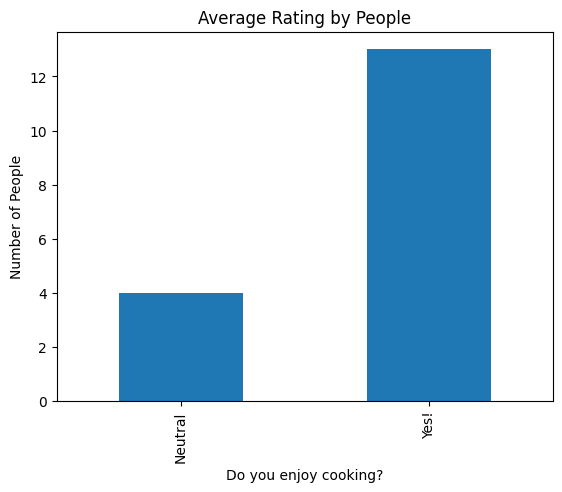

In [114]:
group_data.plot(kind='bar')
plt.title('Average Rating by People')
plt.xlabel('Do you enjoy cooking?')
plt.ylabel('Number of People')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

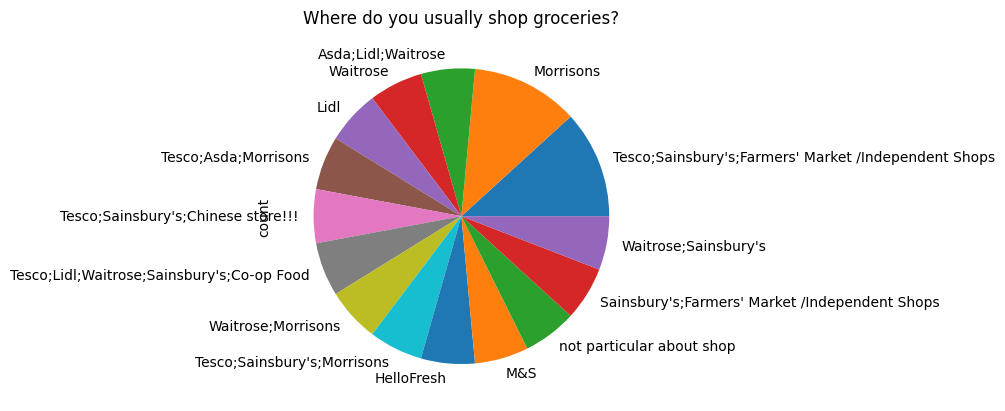

In [119]:
grocery = df["Grocery"].value_counts() 
grocery.plot.pie()
plt.title("Where do you usually shop groceries?")
plt.show

In [120]:
print(grocery)

Grocery
Tesco;Sainsbury's;Farmers' Market /Independent Shops    2
Morrisons                                               2
Asda;Lidl;Waitrose                                      1
Waitrose                                                1
Lidl                                                    1
Tesco;Asda;Morrisons                                    1
Tesco;Sainsbury's;Chinese store!!!                      1
Tesco;Lidl;Waitrose;Sainsbury's;Co-op Food              1
Waitrose;Morrisons                                      1
Tesco;Sainsbury's;Morrisons                             1
HelloFresh                                              1
M&S                                                     1
not particular about shop                               1
Sainsbury's;Farmers' Market /Independent Shops          1
Waitrose;Sainsbury's                                    1
Name: count, dtype: int64


In [131]:
cookinglovers = df[df["Enjoy"] == "Yes!"]
print(cookinglovers)

#GPT note - # Filter the DataFrame to only include rows where 'Enjoy' column has "Yes!"
#cookinglovers = df[df['Enjoy'] == "Yes!"]
#print(cookinglovers)

                       Timestamp                      Cook Enjoy  \
0    2024/10/17 2:13:19 PM GMT+1  Often (4-6 times weekly)  Yes!   
2    2024/10/17 2:14:21 PM GMT+1         Rare (0-2 weekly)  Yes!   
4    2024/10/17 2:15:21 PM GMT+1    Very often (everyday!)  Yes!   
5    2024/10/17 2:15:44 PM GMT+1    Very often (everyday!)  Yes!   
7    2024/10/17 2:40:22 PM GMT+1  Often (4-6 times weekly)  Yes!   
8    2024/10/17 3:57:36 PM GMT+1  Often (4-6 times weekly)  Yes!   
9    2024/10/17 4:47:46 PM GMT+1    Very often (everyday!)  Yes!   
11   2024/10/18 9:29:05 AM GMT+1  Often (4-6 times weekly)  Yes!   
12   2024/10/20 3:02:38 PM GMT+1  Often (4-6 times weekly)  Yes!   
13  2024/10/21 11:08:14 AM GMT+1  Often (4-6 times weekly)  Yes!   
14  2024/10/22 10:04:59 AM GMT+1     Occasionally (weekly)  Yes!   
15  2024/10/22 10:08:07 AM GMT+1     Occasionally (weekly)  Yes!   
16  2024/10/22 10:14:39 AM GMT+1     Occasionally (weekly)  Yes!   

                                              G

In [132]:
location_data = df.groupby("Location")["Location"].count()
print(location_data)

Location
Central (Buckingham Palace, the West End, the City of London etc)    4
East (Shoreditch, Hackney, Stratford, and Canary Wharf etc)          6
No I don't have one                                                  3
South (Clapham, Brixton, and Greenwich etc)                          3
West (Kensington, Chelsea, and Notting Hill etc)                     1
Name: Location, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

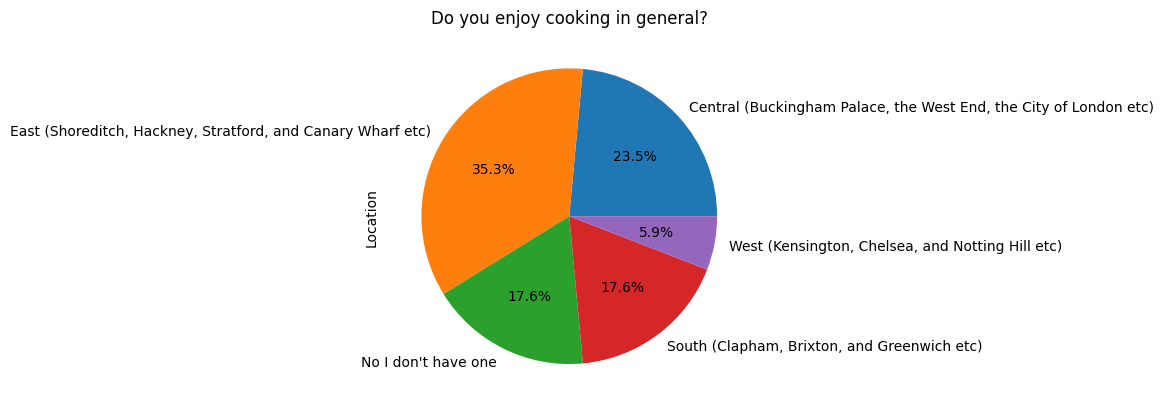

In [135]:
#iincluding the parameters of pie (want to show the number of people (int) for each options as well but seems a bit complicated)
location_data.plot.pie(autopct = "%1.1f%%")
plt.title("Do you enjoy cooking in general?")
plt.show

Text(0.5, 1.0, 'Distribution of Favourite Restaurants locations in London ')

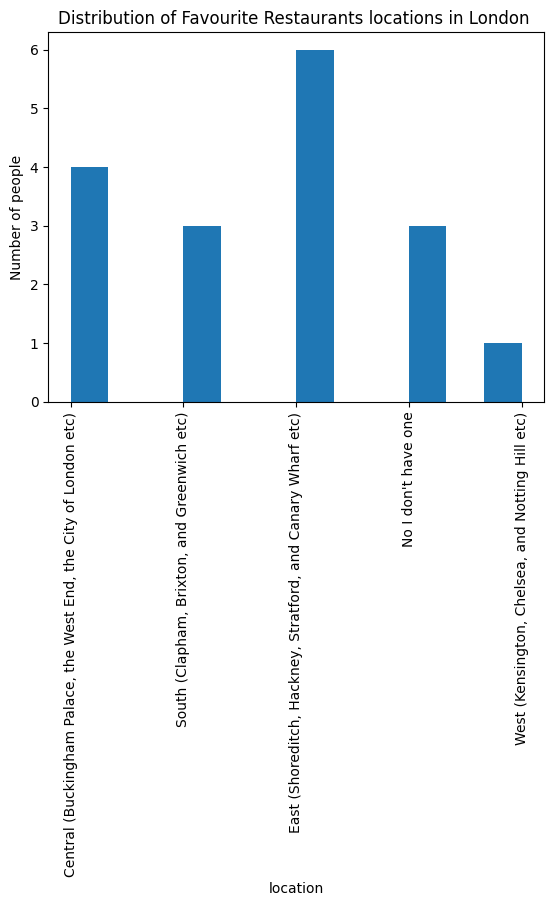

In [138]:
plt.hist(df.Location, bins = 12)
plt.xlabel("location")
plt.xticks(rotation=90)
plt.ylabel("Number of people")
plt.title("Distribution of Favourite Restaurants locations in London ")

In [142]:
# Step 1: Filter DataFrame for those who chose "East"
#east_people = df[df['Location'].str.contains('East')]
#df[...] is a boolean
#.str  ---  turns unique value into strings

# Step 2: Group by 'RestaurantType' and count occurrences
#cuisine_counts = east_people['RestaurantType'].value_counts()

# Output the results
#print(cuisine_counts)

#filter out the row of people who has their fav restaurants in East, loving east
east_people = df[df["Location"].str.contains("East")]
print(east_people.dtypes)

Timestamp         object
Cook              object
Enjoy             object
Grocery           object
Favourite         object
Meals             object
Location          object
RestaurantType    object
Rating             int64
dtype: object


In [143]:
east_people_fav_cuisine = east_people["RestaurantType"].value_counts()
print(east_people_fav_cuisine)

RestaurantType
Chinese Cuisine                                                  1
Japanese Cuisine;Thai Cuisine                                    1
Thai Cuisine                                                     1
Peruvian Cuisine                                                 1
Japanese Cuisine;Mexican Cuisine;Thai Cuisine                    1
Chinese Cuisine;Italian Cuisine;Japanese Cuisine;Thai Cuisine    1
Name: count, dtype: int64


In [10]:
new_word_mapping = {"East (Shoreditch, Hackney, Stratford, and Canary Wharf etc)":"East","North (Camden, Islington, and Hampstead etc)":"North",
            "South (Clapham, Brixton, and Greenwich etc)":"South","West (Kensington, Chelsea, and Notting Hill etc)":"West", "Central (Buckingham Palace, the West End, the City of London etc)":"Central", "No I don't have one":"None" }
new_word = df['Location'].map(new_word_mapping)
df['Location'] = new_word
print(df)

                       Timestamp                      Cook    Enjoy  \
0    2024/10/17 2:13:19 PM GMT+1  Often (4-6 times weekly)     Yes!   
1    2024/10/17 2:13:19 PM GMT+1  Often (4-6 times weekly)  Neutral   
2    2024/10/17 2:14:21 PM GMT+1         Rare (0-2 weekly)     Yes!   
3    2024/10/17 2:14:35 PM GMT+1         Rare (0-2 weekly)  Neutral   
4    2024/10/17 2:15:21 PM GMT+1    Very often (everyday!)     Yes!   
5    2024/10/17 2:15:44 PM GMT+1    Very often (everyday!)     Yes!   
6    2024/10/17 2:17:07 PM GMT+1     Occasionally (weekly)  Neutral   
7    2024/10/17 2:40:22 PM GMT+1  Often (4-6 times weekly)     Yes!   
8    2024/10/17 3:57:36 PM GMT+1  Often (4-6 times weekly)     Yes!   
9    2024/10/17 4:47:46 PM GMT+1    Very often (everyday!)     Yes!   
10   2024/10/17 8:27:53 PM GMT+1  Often (4-6 times weekly)  Neutral   
11   2024/10/18 9:29:05 AM GMT+1  Often (4-6 times weekly)     Yes!   
12   2024/10/20 3:02:38 PM GMT+1  Often (4-6 times weekly)     Yes!   
13  20

Text(0.5, 1.0, 'Distribution of Favourite Restaurants locations in London ')

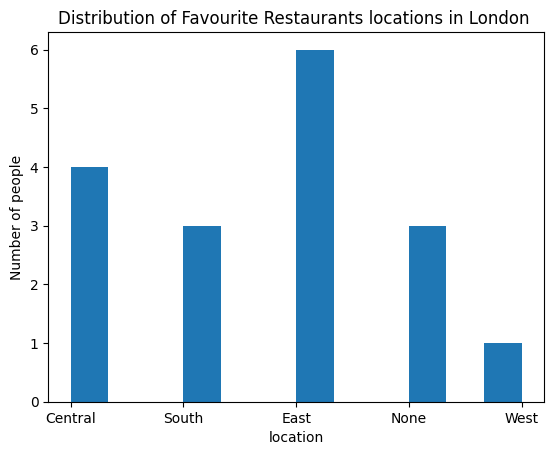

In [9]:
plt.hist(df.Location, bins = 12)
plt.xlabel("location")
plt.ylabel("Number of people")
plt.title("Distribution of Favourite Restaurants locations in London ")

In [37]:
print(df['RestaurantType'].value_counts() )

RestaurantType
Chinese Cuisine                                                  3
Thai Cuisine                                                     2
Caribbean Cuisine                                                2
Peruvian Cuisine                                                 2
Japanese Cuisine;Thai Cuisine                                    1
Don't have preference                                            1
Italian Cuisine                                                  1
Japanese Cuisine                                                 1
Italian Cuisine;Middle Eastern Cuisine                           1
Japanese Cuisine;Mexican Cuisine;Thai Cuisine                    1
Chinese Cuisine;Italian Cuisine;Japanese Cuisine;Thai Cuisine    1
Laos                                                             1
Name: count, dtype: int64


In [38]:
df['RestaurantType'] = df['RestaurantType'].str.split(';')
print(df['RestaurantType'] )

0                                        [Thai Cuisine]
1                                   [Caribbean Cuisine]
2                                     [Chinese Cuisine]
3                      [Japanese Cuisine, Thai Cuisine]
4                                        [Thai Cuisine]
5                               [Don't have preference]
6                                     [Chinese Cuisine]
7                                    [Peruvian Cuisine]
8                                    [Peruvian Cuisine]
9                                     [Italian Cuisine]
10                                    [Chinese Cuisine]
11                                   [Japanese Cuisine]
12                                  [Caribbean Cuisine]
13            [Italian Cuisine, Middle Eastern Cuisine]
14    [Japanese Cuisine, Mexican Cuisine, Thai Cuisine]
15    [Chinese Cuisine, Italian Cuisine, Japanese Cu...
16                                               [Laos]
Name: RestaurantType, dtype: object


In [42]:
exploded_restaurant_df = df.explode('RestaurantType')
print(exploded_restaurant_df.RestaurantType)

0               Thai Cuisine
1          Caribbean Cuisine
2            Chinese Cuisine
3           Japanese Cuisine
3               Thai Cuisine
4               Thai Cuisine
5      Don't have preference
6            Chinese Cuisine
7           Peruvian Cuisine
8           Peruvian Cuisine
9            Italian Cuisine
10           Chinese Cuisine
11          Japanese Cuisine
12         Caribbean Cuisine
13           Italian Cuisine
13    Middle Eastern Cuisine
14          Japanese Cuisine
14           Mexican Cuisine
14              Thai Cuisine
15           Chinese Cuisine
15           Italian Cuisine
15          Japanese Cuisine
15              Thai Cuisine
16                      Laos
Name: RestaurantType, dtype: object


In [58]:
cuisine_counts = exploded_restaurant_df['RestaurantType'].value_counts()
print(cuisine_counts)

RestaurantType
Thai Cuisine              5
Chinese Cuisine           4
Japanese Cuisine          4
Italian Cuisine           3
Caribbean Cuisine         2
Peruvian Cuisine          2
Don't have preference     1
Middle Eastern Cuisine    1
Mexican Cuisine           1
Laos                      1
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

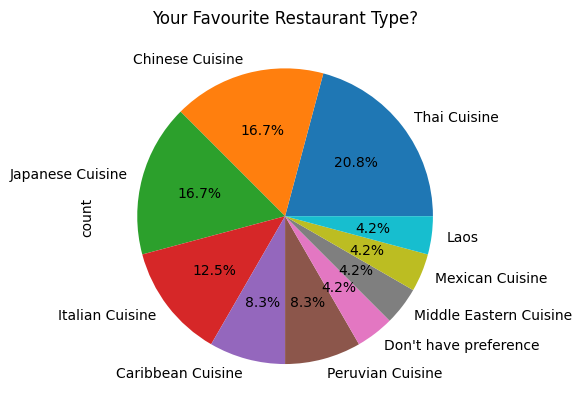

In [60]:
cuisine_counts.plot.pie(autopct = "%1.1f%%")
plt.title("Your Favourite Restaurant Type?")
plt.show

In [55]:
#TO KAT : I tried using the For/In/If function like you shown in the pingpong team example, but somehow it is not working for me, even trying to solve with ChatGPT

# Step 1: Define a list of all possible cuisine types
cuisine_types = ['Chinese Cuisine', 'Japanese Cuisine', 'Thai Cuisine', 'Peruvian Cuisine',
                 'Mexican Cuisine', 'Italian Cuisine']

# Step 2: Initialize an empty dictionary to hold the counts
cuisine_counts = {cuisine: 0 for cuisine in cuisine_types}

# Step 3: Iterate through each response in the 'RestaurantType' column
for response in df['RestaurantType']:
    # Split the multiple responses into a list
    cuisines_in_response = response.split(';')
    
    # Check if each cuisine is present in the response, then update the count
    for cuisine in cuisine_types:
        if isinstance(response, str):
          if cuisine in cuisines_in_response:
            cuisine_counts[cuisine] += 1
        

# Display the resulting dictionary with the cuisine counts
print(cuisine_counts)

AttributeError: 'list' object has no attribute 'split'